<a href="https://colab.research.google.com/github/njuliann/athlete_events/blob/main/athletes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and preparing the data

Import necessary modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import dataset from github repo

In [ ]:
athletes_data = pd.read_csv("https://raw.githubusercontent.com/njuliann/athlete_events/refs/heads/main/athlete_events.csv")

check the shape of the dataset to see whether the import has worked successfully (had some issues with this)

In [ ]:
athletes_data.shape

(271116, 15)

Drop the "Games" column as the data is already in the "Year" and "Season" columns. For example:
* Games: 1992 Summer
* Year: 1992
* Season: Summer

In [ ]:
athletes_data.drop(['Games'], axis = 1, inplace = True)

In [ ]:
print(athletes_data.shape) # now there should be one less column

(271116, 14)


# Getting an overview of the data

Print an overview of the ages.

In [ ]:
print(" Maximum Age: " , athletes_data.Age.max(), "\n" ,
      "Minimum Age: " , athletes_data.Age.min(), "\n",
      "Mean Age: ", athletes_data.Age.mean())

 Maximum Age:  97.0 
 Minimum Age:  10.0 
 Mean Age:  25.556898357297374


Get an overview of the number of values in the dataset

In [ ]:
athletes_data.count()

,0
ID,271116
Name,271116
Sex,271116
Age,261642
Height,210945
Weight,208241
Team,271116
NOC,271116
Year,271116
Season,271116


See how many missing values are there in the dataset.

In [ ]:
print(athletes_data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


<Axes: xlabel='Age'>

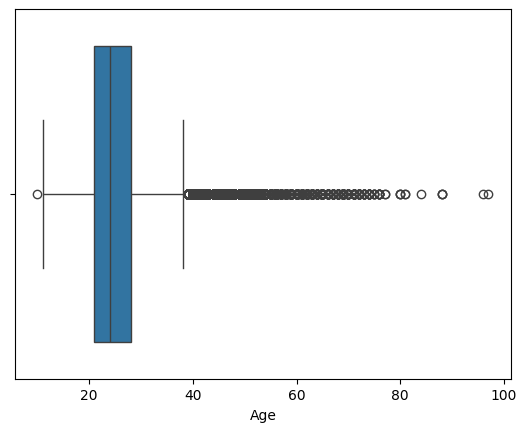

In [ ]:
sns.boxplot(x=athletes_data["Age"])

<Axes: xlabel='Age', ylabel='Count'>

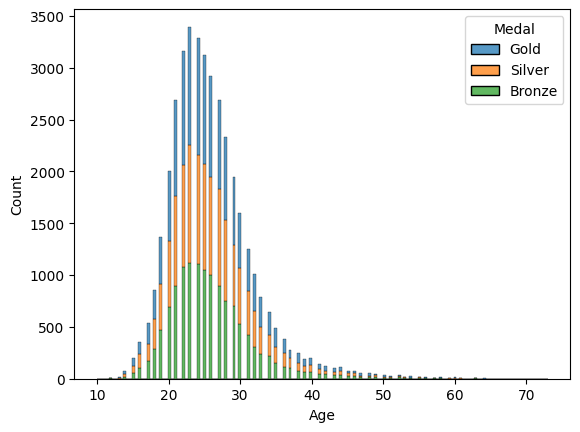

In [ ]:
#1
sns.histplot(athletes_data, x = "Age", hue = "Medal", hue_order=("Gold", "Silver", "Bronze"), multiple = "stack", )

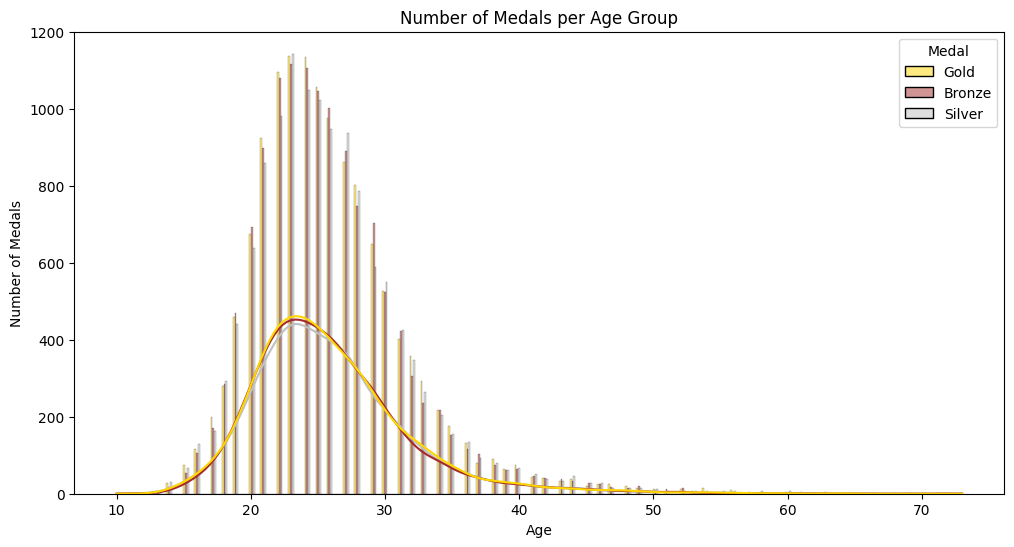

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(athletes_data, x="Age", hue="Medal", multiple="dodge", palette={"Gold": "gold", "Silver": "silver", "Bronze": "brown"}, kde = True)
plt.title('Number of Medals per Age Group')
plt.xlabel('Age')
plt.ylabel('Number of Medals')
plt.show()

Some pivot tests

<Axes: xlabel='Year'>

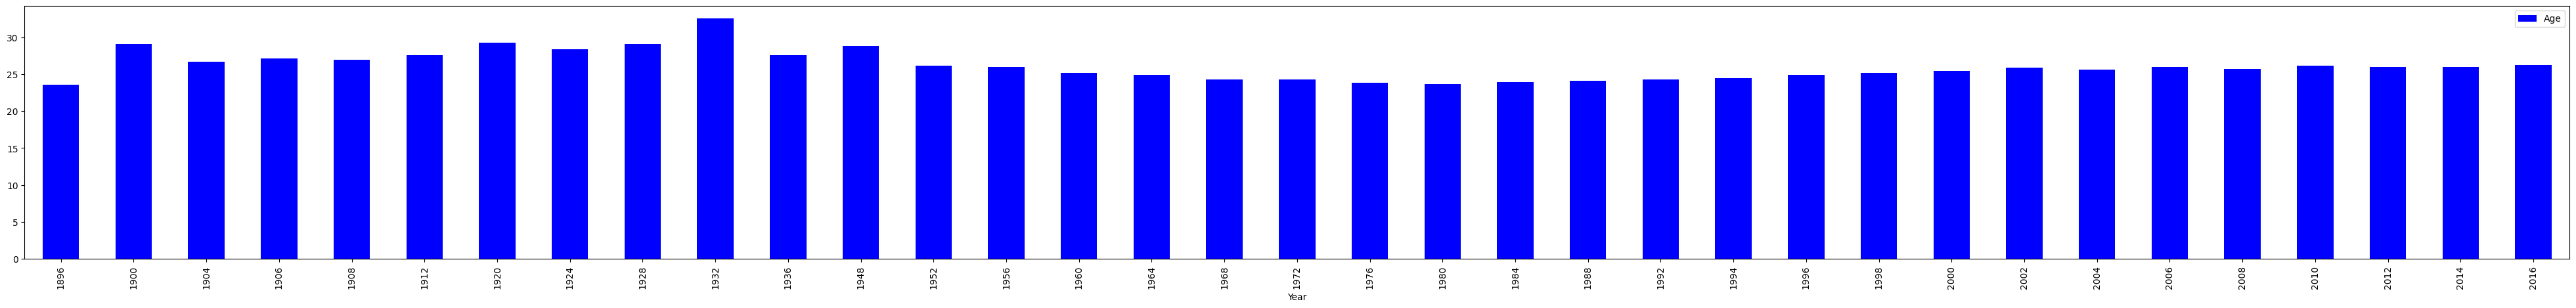

In [ ]:
mean_age = athletes_data.pivot_table(
    index = 'Year',
    values = 'Age',
    aggfunc = 'mean')

mean_age.plot(
    kind = "bar",
    figsize = (50, 5),
    color = 'blue',
    )

## To do: age change per year

<Axes: xlabel='Age'>

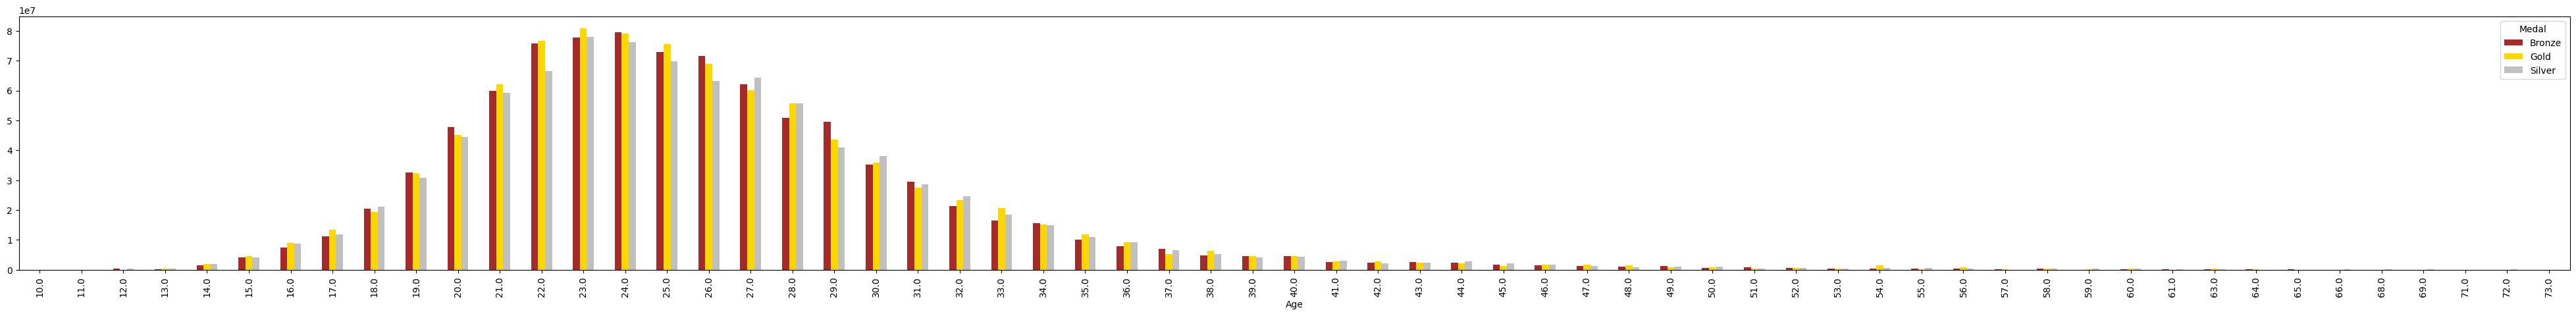

In [ ]:
pivot_medals = athletes_data.pivot_table(
    index = 'Age',
    columns = 'Medal',
    values = 'ID',
    aggfunc = 'sum',
    fill_value = 0)

pivot_medals.plot(
    kind = "bar",
    stacked = False,
    figsize = (50, 5),
    color = ['brown', 'gold', 'silver'],
    )

Country-wise grouping